# Embedded ML - Lab 1.1: Native implementation of Artificial Neural Netwroks

In this lab you are asked to write the code for an Artificial Neural Network (ANN) without using ML libraries such as SciKit-learn, PyTorch or TensorFlow, but you are allowed to use standard libraries such as math, numpy and matplotlib if needed. You are given some code but you are expected to write some more and be able to explain and modify everything. This is a key foundational exercise for you to understand the efficiency aspects that will be dealt with throughout this course.

### Learning outcomes


* Explain the basic concepts of ANNs
* Implement simple ANNs in Python without using advanced libraries
* Analyze the computational resources demanded when training, running inference and scaling ANNs



In [1]:
# To run this notebook, locally as a jupyter notebook, you need to install the following packages:

#1. Create a virtual environment through conda or venv
#   For example, using conda:
#                conda create -n [myenv] python=3.8
#                conda activate [myenv]
#   Or using venv:
#                python3 -m venv [myenv]
#                source [myenv]/bin/activate
#
#
#2. Activate the virtual environment
#3. Install the required packages using pip
#4. Run the notebook


# Install the required packages
%pip install numpy -q
%pip install matplotlib -q


# It use tensorflow JUST to load the minist dataset
%pip install tensorflow -q


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1. Linear regression
Linear regression is perhaps the simplest form of ML and can be thought of as an ANN with a single neuron. Yet, it can make a linear approximation of an input-output pair of data arrays.

Below is an incomplete code for a Python class that implements a linear regressor. You should **complete the missing code** for the predict() and error() methods and then write a simple implementation of the class.

In [2]:
import random

class LinRegressor:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    """
    Predict the output for a given input using the linear model.
    Parameters:
    x (list): List of input values.
    Returns:
    list: List of predicted output values.
    """
    # Initialize an empty list to store predicted Y values
    self.myY = []

    # Iterate through each input value
    for xi in x:
      y_pred = self.w * xi + self.b       # Calculate the predicted Y value using the linear equation
      self.myY.append(y_pred)             # Append the predicted Y value to the list

    return self.myY
  
  def error(self, y):
    """
    Calculate the total error between the predicted and actual output values.
    Parameters:
    y (list): List of actual output values.
    Returns:
    float: Total error (sum of squared differences).
    """
    
    #inicialize the error variable
    total_error = 0

    # Iterate through the predicted and actual Y values
    for i in range(len(self.myY)):
      # Calculate the squared difference between predicted and actual Y values
      total_error += (self.myY[i] - y[i]) ** 2
    
    return total_error
  




datasets = {
    "A": {
    "input": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    "output": [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
    },
    "B": {
    "input": [-8, -5, -3.4, -2, 0, 1.9, 4, 6.2, 8, 11.5],
    "output": [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
    },
}

# 1. Assign values to globals w and b


w = 2  # From dataset A, we can see the slope is 2 (y increases by 2 when x increases by 1)
b = -1  # When x=0, y=-1 in dataset A

# This way we have a linear function y = 2x - 1


# 2. Instantiate the LinRegressor class
lin_reg = LinRegressor(w, b)


# 3. Perform a prediction using dataset A or B
x = datasets["A"]["input"]
y_pred = lin_reg.predict(x)

# 4. Measure the error
y_true = datasets["A"]["output"]
error = lin_reg.error(y_true)
print(f"Error for dataset A: {error}")


# Implementation with dataset B
x = datasets["B"]["input"]
y_pred = lin_reg.predict(x)
y_true = datasets["B"]["output"]
error = lin_reg.error(y_true)
print(f"Error for dataset B: {error}")





Error for dataset A: 0
Error for dataset B: 775.2207


Measure the error for three different sets of parameter values, for each dataset. **Plot the datasets against the predictions** and analyze the model results obtained.

*   Can the error of dataset A be zero?
*   Can the error of dataset B be zero?
*   A zero error means that the model represents the system perfectly?
*   Can you model any kind of system with this type of model?

Dataset to analize A:
Error for dataset A with w=2 and b=-1: 0
Error for dataset A with w=0.5 and b=1: 291.25
Error for dataset A with w=1 and b=1: 105


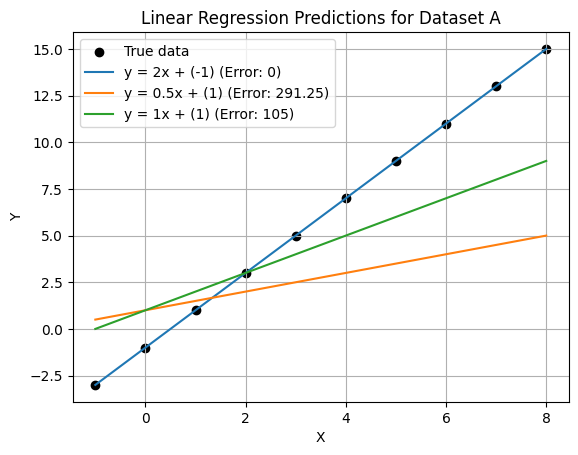

Dataset to analize B:
Error for dataset B with w=2 and b=-1: 775.2207
Error for dataset B with w=0.5 and b=1: 47.25369999999999
Error for dataset B with w=1 and b=1: 146.1727


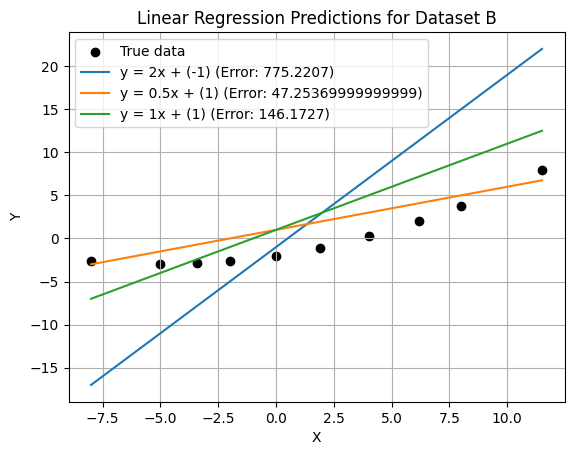

In [3]:
import matplotlib.pyplot as plt


parameters = [(2, -1), (0.5, 1), (1, 1)]


for dataset_name, dataset in datasets.items():
    x = dataset["input"]
    y_true = dataset["output"]

    print(f"Dataset to analize {dataset_name}:")

    plt.Figure(figsize=(10, 5))
    
    # Plot the true data
    plt.scatter(x, y_true, color='black', label='True data')

    # Iterate through the parameters
    for (w, b) in parameters:
        y_pred = []
        model = LinRegressor(w, b)
        y_pred = model.predict(x)
        err = model.error(y_true)
        print(f"Error for dataset {dataset_name} with w={w} and b={b}: {err}")
        
        # Plot the predicted data
        plt.plot(x, y_pred, label=f"y = {w}x + ({b}) (Error: {err})")

    # Set the title and labels
    plt.title(f"Linear Regression Predictions for Dataset {dataset_name}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid()
    plt.show()
    





- Yes, a zero error indicates that the system is perfectly represented, but this does not imply a general rule for all existing systmes. There is no evidence that every dataset can be perfectly represented just because the error value is zero.

- As shown, not all datasets can be accurately represented or predicted by the model. Only datasets that follow a linear trend can be modeled effectively. This explains why dataset B shows higher error values compared to the errors observed in the dataset with the three different sets of parameters ww and bb. Non-linear, chaotic, and discrete systems cannot be accurately represented by such a predictor.

### 2. Artificial Neural Networks
Based on the principles of aproximating the mathematical relationship between two arrays of data, ANNs are scaled up algorithms that connect multiple linear regressors with activation functions in order to detect more complex relationships between data. The computation elements that make up an ANN are called Perceptrons or simply neurons, and they are topologically organized in layers.

Given is a Python code that partially implements a neural network with three layers: input, hidden and output. It defines methods for training and inference and uses the XOR function as a test case.

Study the code to get familiar with it and **complete the implementation of the forward()** method that takes in the network inputs to produce the outputs.
Verify the network works by running the code and observing the error going down and producing corrects results. Also play with the training parameters to see how learning improves or degrades.

Then mode to **implementing the my_dot() method to replace NumPy's dot()**, in order to make explicit the operations that are executed every time the method is called. Modify the forward method to use the new function and verify its correctness.

In [12]:
import numpy as np

class NeuralNetwork:
    """
    A simple feedforward neural network with one hidden layer.
        Attributes:
            input_size (int): Number of input features.
            hidden_size (int): Number of neurons in the hidden layer.
            output_size (int): Number of output neurons.
            weights_input_hidden (numpy.ndarray): Weights from input to hidden layer.
            bias_input_hidden (numpy.ndarray): Bias for hidden layer.
            weights_hidden_output (numpy.ndarray): Weights from hidden to output layer.
            bias_hidden_output (numpy.ndarray): Bias for output layer.
        Methods:
            my_dot(A, B): Custom dot product function to calculate the dot product of two matrices.
            sigmoid(x): Sigmoid activation function.
            sigmoid_derivative(x): Derivative of the sigmoid function.
            forward(x): Forward pass through the network.
            backward(x, y, output, learning_rate): Backpropagation algorithm to update weights and biases.
            train(x, y, epochs, learning_rate): Train the neural network using backpropagation.
    """

    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize the neural network with input, hidden, and output sizes.
            Parameters:
                input_size (int): Number of input features.
                hidden_size (int): Number of neurons in the hidden layer.
                output_size (int): Number of output neurons.
            Returns:
                None 
        """

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))


    def my_dot(self, A, B):
        """
        Custom dot product function to calculate the dot product of two matrices.
            Parameters:
                A (numpy.ndarray): First matrix.
                B (numpy.ndarray): Second matrix.
            Returns:
                numpy.ndarray: Result of the dot product.

        """
        
         # Get the number of columns in matrix B (i.e., number of output features or neurons)
        cols = B.shape[1]

        # Get the number of rows in matrix A (i.e., number of input samples)
        rows = A.shape[0]

        # Initialize the result matrix with zeros, with shape (rows of A, columns of B)
        Neurons = np.zeros((rows, cols))

        # Iterate over each column in B (each output neuron)
        for c in range(cols):
            # Iterate over each row in A (each input sample)
            for row in range(rows):
                a = 0  # Accumulator for the dot product of row A and column B
                # Iterate over the shared dimension to compute the dot product
                for i in range(A.shape[1]):
                    a += A[row][i] * B[i][c]  # Multiply and accumulate
                Neurons[row][c] = a  # Store the result in the output matrix

        return Neurons  # Return the computed dot product matrix


    def sigmoid(self, x):
        """
        Sigmoid activation function.
            Parameters:
                x (numpy.ndarray): Input data.
            Returns:
                numpy.ndarray: Output after applying the sigmoid function.
        """

        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        Derivative of the sigmoid function.
            Parameters:
                x (numpy.ndarray): Input data.
            Returns:
                numpy.ndarray: Derivative of the sigmoid function.
        """
        return x * (1 - x)

    def forward(self, x):
        """
        Realiza el paso hacia adelante de la red neuronal.
    
        Parameters:
            x (numpy.ndarray): Entrada de forma (batch_size, input_size) o (input_size,)
    
        Returns:
            numpy.ndarray: Salida de la red neuronal después de aplicar activaciones.
        """
        # Asegurar entrada como 2D
        if x.ndim == 1:
            x = x.reshape(1, -1)
    
        self.input = x  # guardar para backprop

        # Capa de entrada a capa oculta
        self.hidden_input = self.my_dot(self.input, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        # Capa oculta a salida
        self.output_input = self.my_dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output = self.sigmoid(self.output_input)

        return self.output


    def backward(self, x, y, output, learning_rate):
        """
        Backpropagation algorithm to update weights and biases.
            Parameters:
                x (numpy.ndarray): Input data.
                y (numpy.ndarray): Target output data.
                output (numpy.ndarray): Predicted output data.
                learning_rate (float): Learning rate for weight updates.
        
            Returns:
                None
        """

        # Calculate the error and gradients
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        # Backpropagation
        self.hidden_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        """
        Train the neural network using backpropagation.
            Parameters:
                x (numpy.ndarray): Input data.
                y (numpy.ndarray): Target output data.
                epochs (int): Number of training epochs.
                learning_rate (float): Learning rate for weight updates.
            Returns:
                None
        """

        error = 0
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                error = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {error:.4f}')


# Define XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
# The input size is 2 (for XOR), hidden size is 4, and output size is 1
# So the parameters of the NeuralNetwork class are:
# input_size = 2------------------->    I: Number of inputs
# hidden_size = 4----------------->     H: Number of neurons in the hidden layer
# output_size = 1----------------->     O: Number of outputs

# Create a neural network instance
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)

# Train the neural network
nn.train(X, y, epochs=1000, learning_rate=0.8)

# Test the trained model
print("\nTest the trained model:")
for i in range(len(X)):
    output = nn.forward(X[i])
    print(f"Input: {X[i]}, Predicted Output: {output}, Actual Output: {y[i]}")

Epoch 0: Loss = 0.2606
Epoch 100: Loss = 0.2105
Epoch 200: Loss = 0.0914
Epoch 300: Loss = 0.0256
Epoch 400: Loss = 0.0119
Epoch 500: Loss = 0.0073
Epoch 600: Loss = 0.0051
Epoch 700: Loss = 0.0039
Epoch 800: Loss = 0.0032
Epoch 900: Loss = 0.0026

Test the trained model:
Input: [0 0], Predicted Output: [[0.02890126]], Actual Output: [0]
Input: [0 1], Predicted Output: [[0.95422944]], Actual Output: [1]
Input: [1 0], Predicted Output: [[0.9488171]], Actual Output: [1]
Input: [1 1], Predicted Output: [[0.05849568]], Actual Output: [0]


Let's define an abstraction in which basic computations are: additions, subtractions, multiplications, divisions or computing an activation fuction such as the sigmoid or its derivative. Then, analyze the code in detail to answer the following questions:

*   How many scalar basic computations are requiered for one forward pass, for one training iteration and for a complete training process?
*   Which are the newtwork parameters that determine the amount of computations required?

**Write a formula** that gives the amount of basic scalar computations depending on the network parameters.

## Solution

From the code we can obtain the parameters:
* **I**: Number of inputs.
* **H**: Number of neurons in the hide layer.
* **O**: Number of outputs.
* **N**: Number of training examples. 
* **E**: Number of epochs

To calculate the number of operations in the forward pass for one sample, we divide the task into two main steps:  
1. From the input to the hidden layer  
2. From the hidden layer to the output  

### First step:

Here we have:
```Python
self.hidden_input = self.my_dot(self.input.tolist(), self.weights_input_hidden.tolist())
self.hidden_input = np.array(self.hidden_input) + self.bias_input_hidden
self.hidden_output = self.sigmoid(self.hidden_input)

```

This step performs: $I*H$ multiplications, $I*H$ additions and H sigmoide operation. 

### Second step:

Now in the second step, we have the following code:
```Python
self.output_input = self.my_dot(self.hidden_output.tolist(), self.weights_hidden_output.tolist())
self.output_input = np.array(self.output_input) + self.bias_hidden_output
self.output = self.sigmoid(self.output_input)
```

this step performs: $H*O$ multiplications, $H*O + O$ additions and O sigmoide operation

In sumary the total of operations in a single sample fordware operation is
$$ C_{forward} = 2(IH + HO) + 2H +2O$$

Now we calculate the number of operations in one training iteration per sample. Again, we divide the computation into three parts:

### Output error and gradient. 

It contains the follow code
```python
self.error = y - output
d_output = self.error * self.sigmoid_derivative(output)
```

This step includes: $O$ subtractions, $2*O$ Derivates and $O$ element-wise multiplication. So we get $$*O$ operations. 

### Backpropagate to hidden.
With the following code:

```python
self.hidden_error = d_output.dot(self.weights_hidden_output.T)
d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)
```

This step includes: $H*O$ multiplications and $H*(O-1)$ and $3*H$ for the sigmoid derivate and the multiplications for element wise gradient, obtaining then: $H(2O+2)$

### Update weights and biases.

Finally the code:
```python
self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
```
obtaining $H*O + I*H$ multiplications and $H*O+I*H + O + O$ additions


To get the final expresion to estimate the number of operations:

$$C_{backward} = 2(IH + HO) +4H + 5O $$

And for the total of operations in the train process, with all the samples and epochs we could estimate with:

$$C_{total} = EN[2(IH + HO) +4H + 5O]$$

### 3. Scaling ANNs

In manys cases, but not all, increasing the number of layers and the number of neurons per layer leads to a higher accuracy of the model. This comes at the expense of more resources needed to run the network: memory and computation. And ultimately, it can lead to a higher application latency and energy consumption.

Here you should create a fully-connected neural network based on the previous model, this time to classify handwritten numbers using the **MNIST dataset**. Investigate how to obtain the dataset and how to prepare a proper partition between training and test.

The number of input neurons must be equal to the number of pixels on each image (depending on the chosen resolution). The number of output neurons must be 10, since there are 10 diffirent digits we want to classify. A new method must be included to select which of the digits was identified (by finding the most active output neuron). **Configure and test at least five versions of the model** by varying the amount of neurons in the hidden layer.

Make a table or a plot to report the following for each model:

*   Number of model parameters
*   Number of basic scalar computations for a forward pass (using the previously created formula)
*   Execution time for training and for a forward pass
*   Model's Top-1 accuracy.

In [13]:
# Neural network with np.dot 
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization
x_train = x_train.reshape((-1, 28 * 28))/ 255
x_test = x_test.reshape((-1, 28 * 28)) / 255

# One-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# select a subset of the dataset
x_subset = x_train[:1000]
y_subset = y_train[:1000]



In [14]:
class NeuralNetwork_np:
    """
    A simple feedforward neural network with one hidden layer using NumPy's dot product.
    """

    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        self.input = x
        self.hidden_input = np.dot(self.input, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output = self.sigmoid(self.output_input)

        return self.output

    def backward(self, x, y, output, learning_rate):
        error = y - output
        d_output = error * self.sigmoid_derivative(output)

        hidden_error = np.dot(d_output, self.weights_hidden_output.T)
        d_hidden = hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += np.dot(self.hidden_output.T, d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += np.dot(x.T, d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}: Loss = {loss:.4f}")


# Create a neural network instance
nn = NeuralNetwork_np(input_size=28 * 28, hidden_size=10, output_size=10)
# Train the neural network
nn.train(x_subset, y_subset, epochs=2000, learning_rate=0.001)


Epoch 0: Loss = 0.3691
Epoch 100: Loss = 0.0881
Epoch 200: Loss = 0.0828
Epoch 300: Loss = 0.0771
Epoch 400: Loss = 0.0709
Epoch 500: Loss = 0.0655
Epoch 600: Loss = 0.0610
Epoch 700: Loss = 0.0570
Epoch 800: Loss = 0.0531
Epoch 900: Loss = 0.0493
Epoch 1000: Loss = 0.0457
Epoch 1100: Loss = 0.0425
Epoch 1200: Loss = 0.0397
Epoch 1300: Loss = 0.0371
Epoch 1400: Loss = 0.0350
Epoch 1500: Loss = 0.0332
Epoch 1600: Loss = 0.0317
Epoch 1700: Loss = 0.0304
Epoch 1800: Loss = 0.0292
Epoch 1900: Loss = 0.0281


In [15]:
correct_predictions = 0

print("\nTest the trained model:")


for i in range(len(x_test)):
    output = nn.forward(x_test[i])
    predicted_class = np.argmax(output)
    actual_class = np.argmax(y_test[i])
    
    print(f"Predicted Output: {predicted_class}, Actual Output: {actual_class}")

    if predicted_class == actual_class:
        correct_predictions += 1
    

print(f"Accuracy: {correct_predictions / len(x_test) * 100:.2f}%")


Test the trained model:
Predicted Output: 7, Actual Output: 7
Predicted Output: 5, Actual Output: 2
Predicted Output: 1, Actual Output: 1
Predicted Output: 0, Actual Output: 0
Predicted Output: 4, Actual Output: 4
Predicted Output: 1, Actual Output: 1
Predicted Output: 4, Actual Output: 4
Predicted Output: 9, Actual Output: 9
Predicted Output: 2, Actual Output: 5
Predicted Output: 9, Actual Output: 9
Predicted Output: 0, Actual Output: 0
Predicted Output: 6, Actual Output: 6
Predicted Output: 9, Actual Output: 9
Predicted Output: 0, Actual Output: 0
Predicted Output: 1, Actual Output: 1
Predicted Output: 5, Actual Output: 5
Predicted Output: 7, Actual Output: 9
Predicted Output: 7, Actual Output: 7
Predicted Output: 3, Actual Output: 3
Predicted Output: 4, Actual Output: 4
Predicted Output: 9, Actual Output: 9
Predicted Output: 6, Actual Output: 6
Predicted Output: 4, Actual Output: 6
Predicted Output: 6, Actual Output: 5
Predicted Output: 9, Actual Output: 4
Predicted Output: 0, Actu

In [16]:
# probe with different params
import time
probes = [10, 20, 30, 100, 200]
accuracy = []
times_inferences = []
single_inference_times = []
times_trainings = []
operations = []

# create the different neural networks
for neurons in probes:
    nn = NeuralNetwork_np(input_size=28 * 28, hidden_size=neurons, output_size=10)

    start_time = time.time()
    # train the neural network
    nn.train(x_subset, y_subset, epochs=1000, learning_rate=0.01)
    end_time = time.time()
    times_trainings.append(end_time - start_time)

    correct_predictions = 0

    start_time = time.time()
    for i in range(len(x_test)):

        start_time_single = time.time()
        output = nn.forward(x_test[i])
        predicted_class = np.argmax(output)
        actual_class = np.argmax(y_test[i])
        end_time_single = time.time()

        if predicted_class == actual_class:
            correct_predictions += 1
    end_time = time.time()

    # Calculate the number of operations based on the number of neurons
    operation = 2*((28*28)*(neurons) + (neurons*10)) + 2*(neurons + 10)

    single_inference_times.append(end_time_single - start_time_single)
    times_inferences.append(end_time - start_time)
    accuracy.append(correct_predictions / len(x_test) * 100)
    operations.append(operation)
    





Epoch 0: Loss = 0.3207
Epoch 100: Loss = 0.0496
Epoch 200: Loss = 0.0316
Epoch 300: Loss = 0.0220
Epoch 400: Loss = 0.0176
Epoch 500: Loss = 0.0150
Epoch 600: Loss = 0.0131
Epoch 700: Loss = 0.0115
Epoch 800: Loss = 0.0104
Epoch 900: Loss = 0.0098
Epoch 0: Loss = 0.4504
Epoch 100: Loss = 0.0602
Epoch 200: Loss = 0.0327
Epoch 300: Loss = 0.0247
Epoch 400: Loss = 0.0206
Epoch 500: Loss = 0.0151
Epoch 600: Loss = 0.0127
Epoch 700: Loss = 0.0109
Epoch 800: Loss = 0.0098
Epoch 900: Loss = 0.0090
Epoch 0: Loss = 0.4787
Epoch 100: Loss = 0.0537
Epoch 200: Loss = 0.0310
Epoch 300: Loss = 0.0241
Epoch 400: Loss = 0.0141
Epoch 500: Loss = 0.0100
Epoch 600: Loss = 0.0081
Epoch 700: Loss = 0.0070
Epoch 800: Loss = 0.0063
Epoch 900: Loss = 0.0058
Epoch 0: Loss = 0.3272
Epoch 100: Loss = 0.0791
Epoch 200: Loss = 0.0735
Epoch 300: Loss = 0.0710
Epoch 400: Loss = 0.0702
Epoch 500: Loss = 0.0656
Epoch 600: Loss = 0.0622
Epoch 700: Loss = 0.0613
Epoch 800: Loss = 0.0611
Epoch 900: Loss = 0.0610
Epoch 0:

In [17]:
# Print results
for i, neurons in enumerate(probes):
    print(f"Hidden Neurons: {neurons}")
    print(f"Accuracy: {accuracy[i]:.2f}%")
    print(f"Training Time: {times_trainings[i]:.2f} seconds")
    print(f"Single Inference Time: {single_inference_times[i]:.2f} seconds")
    print(f"Operations: {operations[i]:.2e}")
    print("-" * 30)
    



Hidden Neurons: 10
Accuracy: 74.97%
Training Time: 3.62 seconds
Single Inference Time: 0.00 seconds
Operations: 1.59e+04
------------------------------
Hidden Neurons: 20
Accuracy: 79.37%
Training Time: 3.08 seconds
Single Inference Time: 0.00 seconds
Operations: 3.18e+04
------------------------------
Hidden Neurons: 30
Accuracy: 77.96%
Training Time: 4.10 seconds
Single Inference Time: 0.00 seconds
Operations: 4.77e+04
------------------------------
Hidden Neurons: 100
Accuracy: 37.88%
Training Time: 8.81 seconds
Single Inference Time: 0.00 seconds
Operations: 1.59e+05
------------------------------
Hidden Neurons: 200
Accuracy: 39.47%
Training Time: 16.77 seconds
Single Inference Time: 0.00 seconds
Operations: 3.18e+05
------------------------------


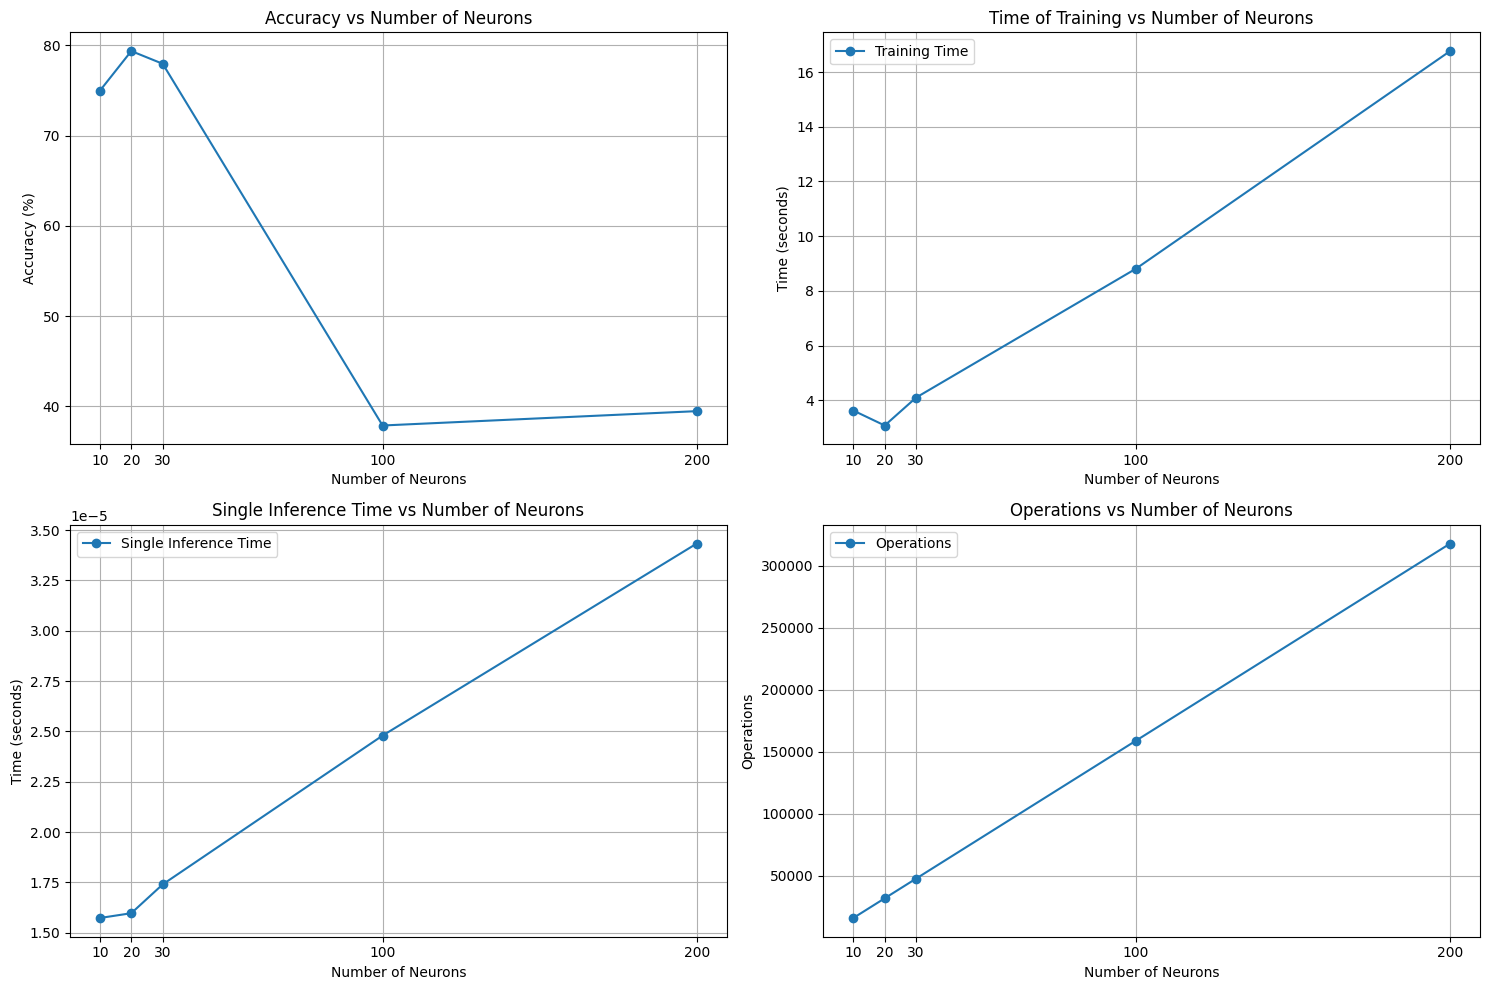

In [18]:
# Plotting the results
import matplotlib.pyplot as plt
import numpy as np

# Plot accuracy vs number of neurons
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy vs Number of Neurons
axs[0, 0].plot(probes, accuracy, marker='o')
axs[0, 0].set_title('Accuracy vs Number of Neurons')
axs[0, 0].set_xlabel('Number of Neurons')
axs[0, 0].set_ylabel('Accuracy (%)')
axs[0, 0].set_xticks(probes)
axs[0, 0].grid()

# Time of Training vs Number of Neurons
axs[0, 1].plot(probes, times_trainings, marker='o', label='Training Time')
axs[0, 1].set_title('Time of Training vs Number of Neurons')
axs[0, 1].set_xlabel('Number of Neurons')
axs[0, 1].set_ylabel('Time (seconds)')
axs[0, 1].set_xticks(probes)
axs[0, 1].legend()
axs[0, 1].grid()

# Single Inference Time vs Number of Neurons
axs[1, 0].plot(probes, single_inference_times, marker='o', label='Single Inference Time')
axs[1, 0].set_title('Single Inference Time vs Number of Neurons')
axs[1, 0].set_xlabel('Number of Neurons')
axs[1, 0].set_ylabel('Time (seconds)')
axs[1, 0].set_xticks(probes)
axs[1, 0].legend()
axs[1, 0].grid()

# Operations vs Number of Neurons
axs[1, 1].plot(probes, operations, marker='o', label='Operations')
axs[1, 1].set_title('Operations vs Number of Neurons')
axs[1, 1].set_xlabel('Number of Neurons')
axs[1, 1].set_ylabel('Operations')
axs[1, 1].set_xticks(probes)
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout()
plt.show()
